<div align="center">

## BIKE RENTAL ANALYSIS - EXPLORATION AND PRELIMINARY ANALYSIS

</div>

**Necessary libriaries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Uploading data to pandas - CSV file**

In [3]:
df = pd.read_csv(r"C:\Users\Z004RMER\Desktop\PROJECT_BIKE_RENTAL\data\day.csv")

**Data in Pandas - first few rows**

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Checking data with describe() function to observe if there are any anomalies**

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


*Conclusions based on output of describe() method*
- 'temp', 'atemp', 'hum', 'windspeed' values are in range between 0 and 1 so it means that the data was normalized.
- for 'causal' min value is 2, max value is 3410 and mean is 848 which probably suggest that there are some outliers.

**Ivestigating correlation between variables by heatmap**
- 'dteday' which includes date was excluded due to not numeric format.

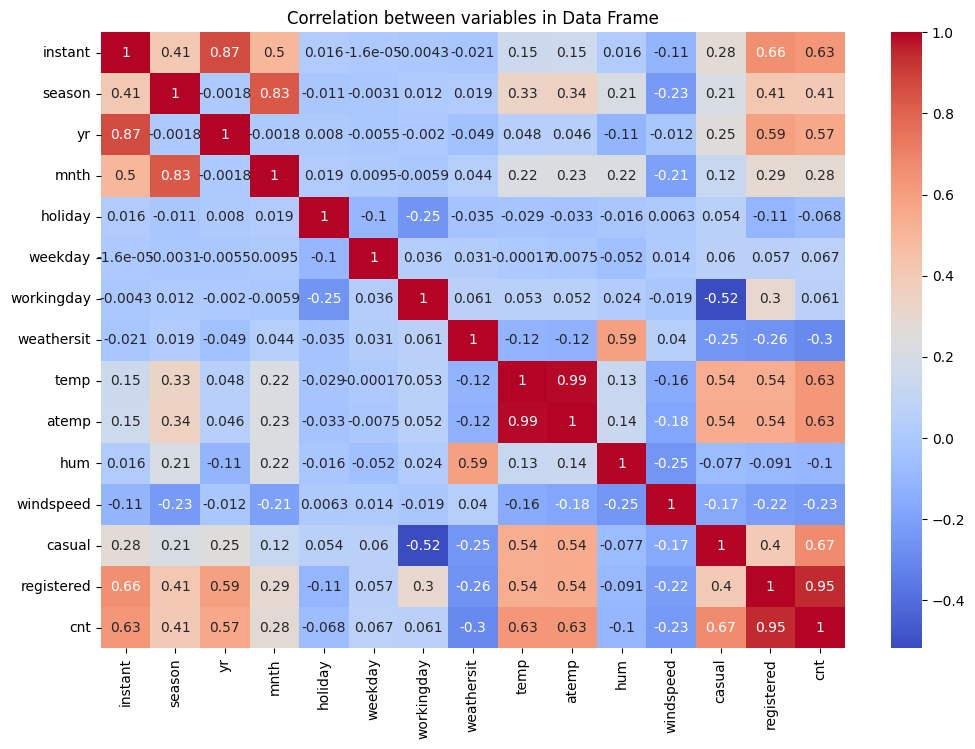

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between variables in Data Frame")
plt.show()

Observation from Heatmap:
- positive correlation of temperature with numebr of loans which means that higher temperature is important
- negative correlation with 'weathersit' means worse weather ==> less loans
- positive correlation with season but not strong 
- very strong correlation of registered user with cnt. This main group of active users.


**Investigate some dependencies/correlations on other type of plots**

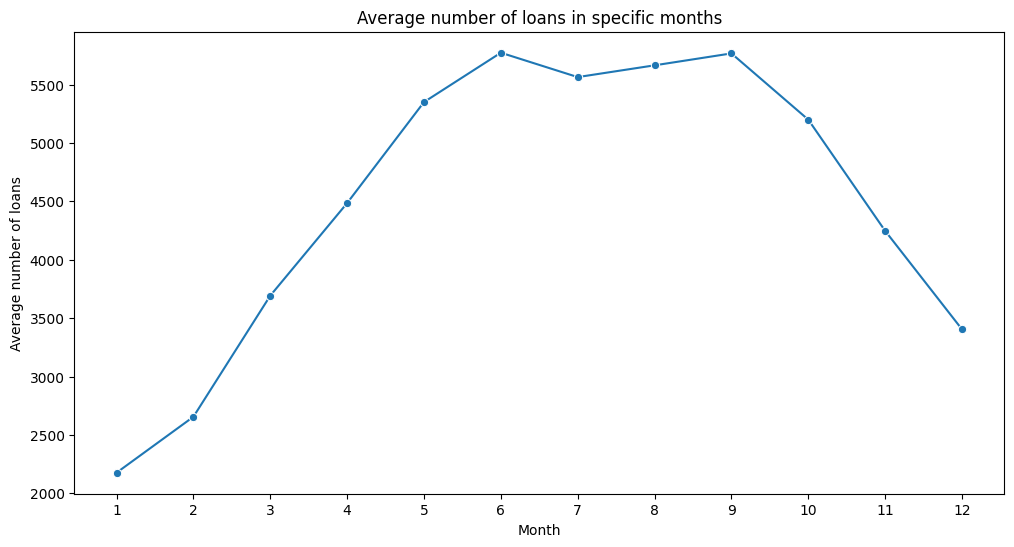

In [7]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['month'] = df['dteday'].dt.month

monthly_avg = df.groupby('month')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', data=monthly_avg, marker='o')
plt.title("Average number of loans in specific months")
plt.xlabel("Month")
plt.ylabel("Average number of loans")
plt.xticks(range(1, 13))
plt.show()

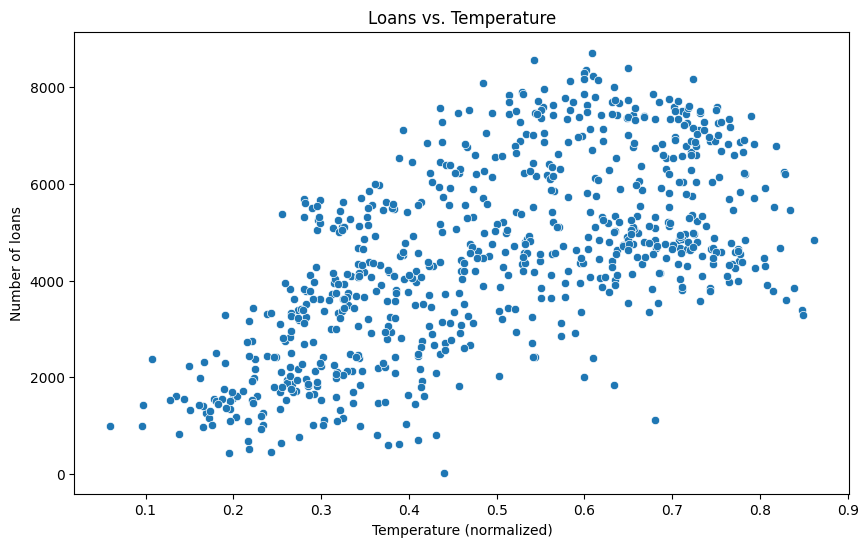

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title("Loans vs. Temperature")
plt.xlabel("Temperature (normalized)")
plt.ylabel("Number of loans")
plt.show()

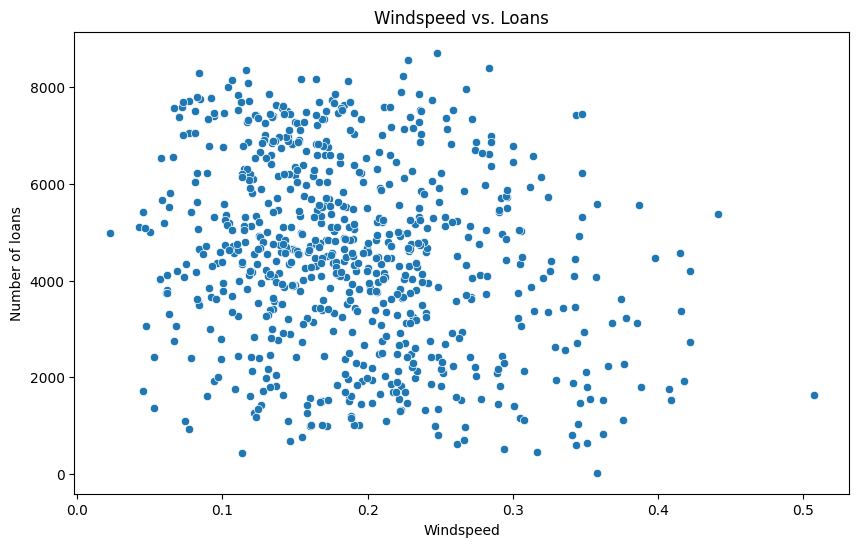

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df)
plt.title("Windspeed vs. Loans")
plt.xlabel("Windspeed")
plt.ylabel("Number of loans")
plt.show()

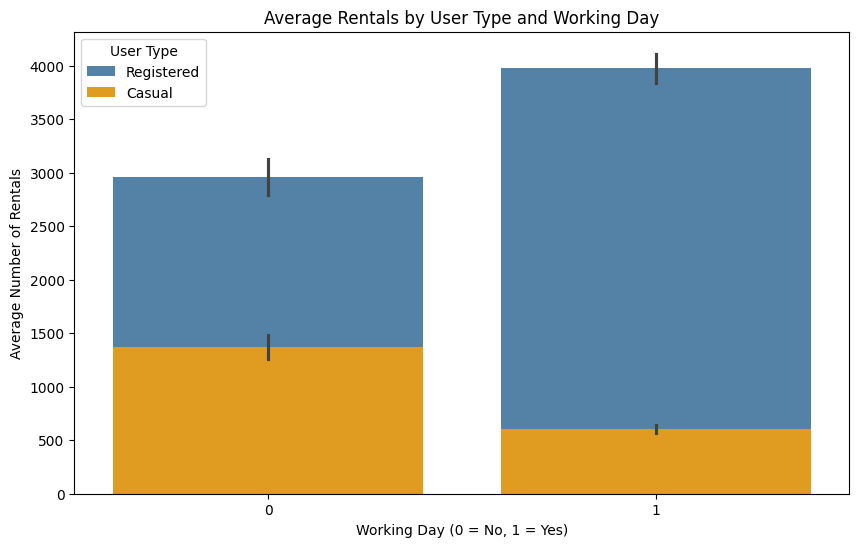

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='registered', data=df, estimator='mean', color='steelblue', label='Registered')
sns.barplot(x='workingday', y='casual', data=df, estimator='mean', color='orange', label='Casual')

plt.title("Average Rentals by User Type and Working Day")
plt.xlabel("Working Day (0 = No, 1 = Yes)")
plt.ylabel("Average Number of Rentals")
plt.legend(title='User Type')
plt.show()

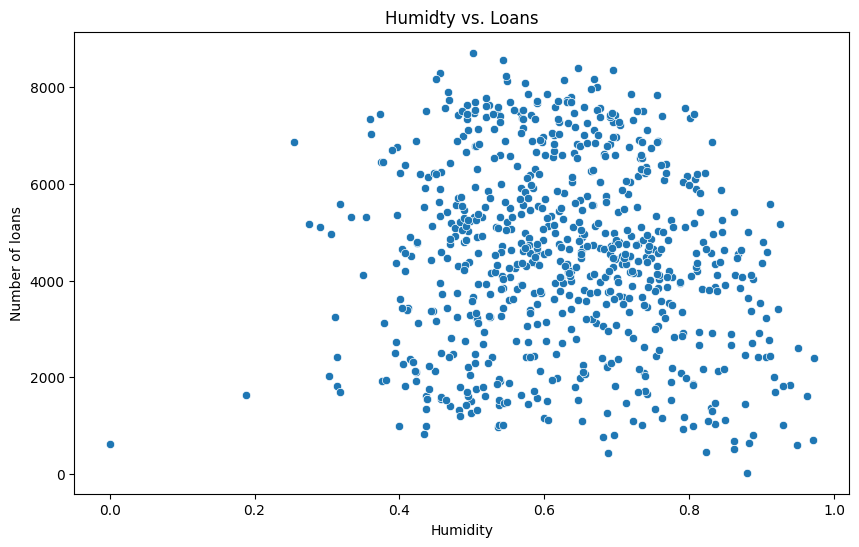

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df)
plt.title("Humidty vs. Loans")
plt.xlabel("Humidity")
plt.ylabel("Number of loans")
plt.show()

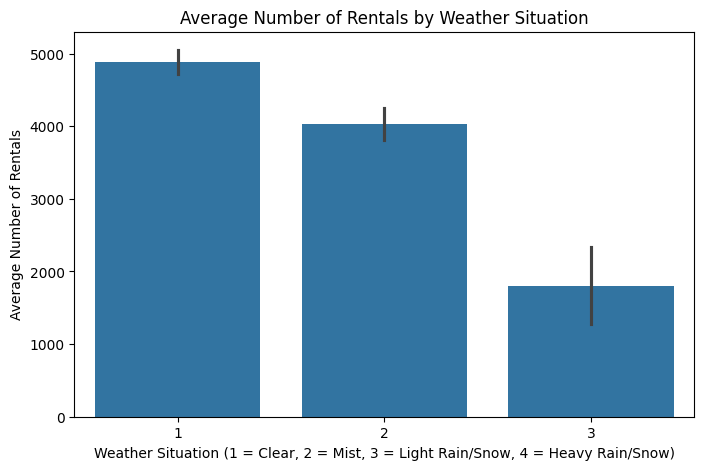

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=df, estimator='mean')
plt.title("Average Number of Rentals by Weather Situation")
plt.xlabel("Weather Situation (1 = Clear, 2 = Mist, 3 = Light Rain/Snow, 4 = Heavy Rain/Snow)")
plt.ylabel("Average Number of Rentals")
plt.show()

**Conclusions**
- The main rental months are June, July, August and September.
- As temperatures rise, so does the number of rentals.
- The less wind, the more rentals.
- On working days, the rentals are made mainly by registered users, while on days off the number of rentals is very similar for casual and registered users.
- The better the weather, the more rentals.
- More rents for higher humidity
